In [ ]:
#@title LOAD LIBS
from __future__ import division, print_function, unicode_literals #py2 and py3
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns
sns.set_theme()
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow import keras

Mounted at /content/drive


In [ ]:
#@title LOAD CSV
df = pd.read_csv('/content/drive/My Drive/Terrorism-in-world/globalterrorismdb.csv', encoding='latin-1', low_memory= False)
ndf = df.select_dtypes(include=['float64', 'int64'])#Columnas no categoricas
ndf = ndf.drop(['crit1', 'crit2', 'alternative', 'suicide', 'multiple', 'attacktype2', 'attacktype3', 'targtype2', 'targsubtype2', 'natlty2', 'targtype3', 'targsubtype3', 'natlty3',
'guncertain3', 'individual', 'claimmode', 'claim2', 'claimmode2', 'claim3', 'claimmode3', 'compclaim', 'guncertain2', 'weaptype3', 'weapsubtype3', 'weaptype4', 'weapsubtype4', 'ransompaid',
'ransompaidus', 'ransomamtus', 'INT_IDEO', 'targsubtype1', 'iyear'], axis=1)
ndf = ndf.fillna(0)
ndf.head(10)

,eventid,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,...,nhostkidus,nhours,ndays,ransom,ransomamt,hostkidoutcome,nreleased,INT_LOG,INT_MISC,INT_ANY
0,197000000001,7,2,0,58,2,18.456792,-69.951164,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,197000000002,0,0,0,130,1,19.371887,-99.086624,1.0,0,...,0.0,0.0,0.0,1.0,800000.0,0.0,0.0,0,1,1
2,197001000001,1,0,0,160,5,15.478598,120.599741,4.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9,1,1
3,197001000002,1,0,0,78,8,37.997490,23.762728,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9,1,1
4,197001000003,1,0,0,101,4,33.580412,130.396361,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9,1,1
5,197001010002,1,1,0,217,1,37.005105,-89.176269,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9,0,-9
6,197001020001,1,2,0,218,3,-34.891151,-56.187214,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
7,197001020002,1,2,0,217,1,37.791927,-122.225906,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9,0,-9
8,197001020003,1,2,0,217,1,43.076592,-89.412488,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
9,197001030001,1,3,0,217,1,43.072950,-89.386694,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


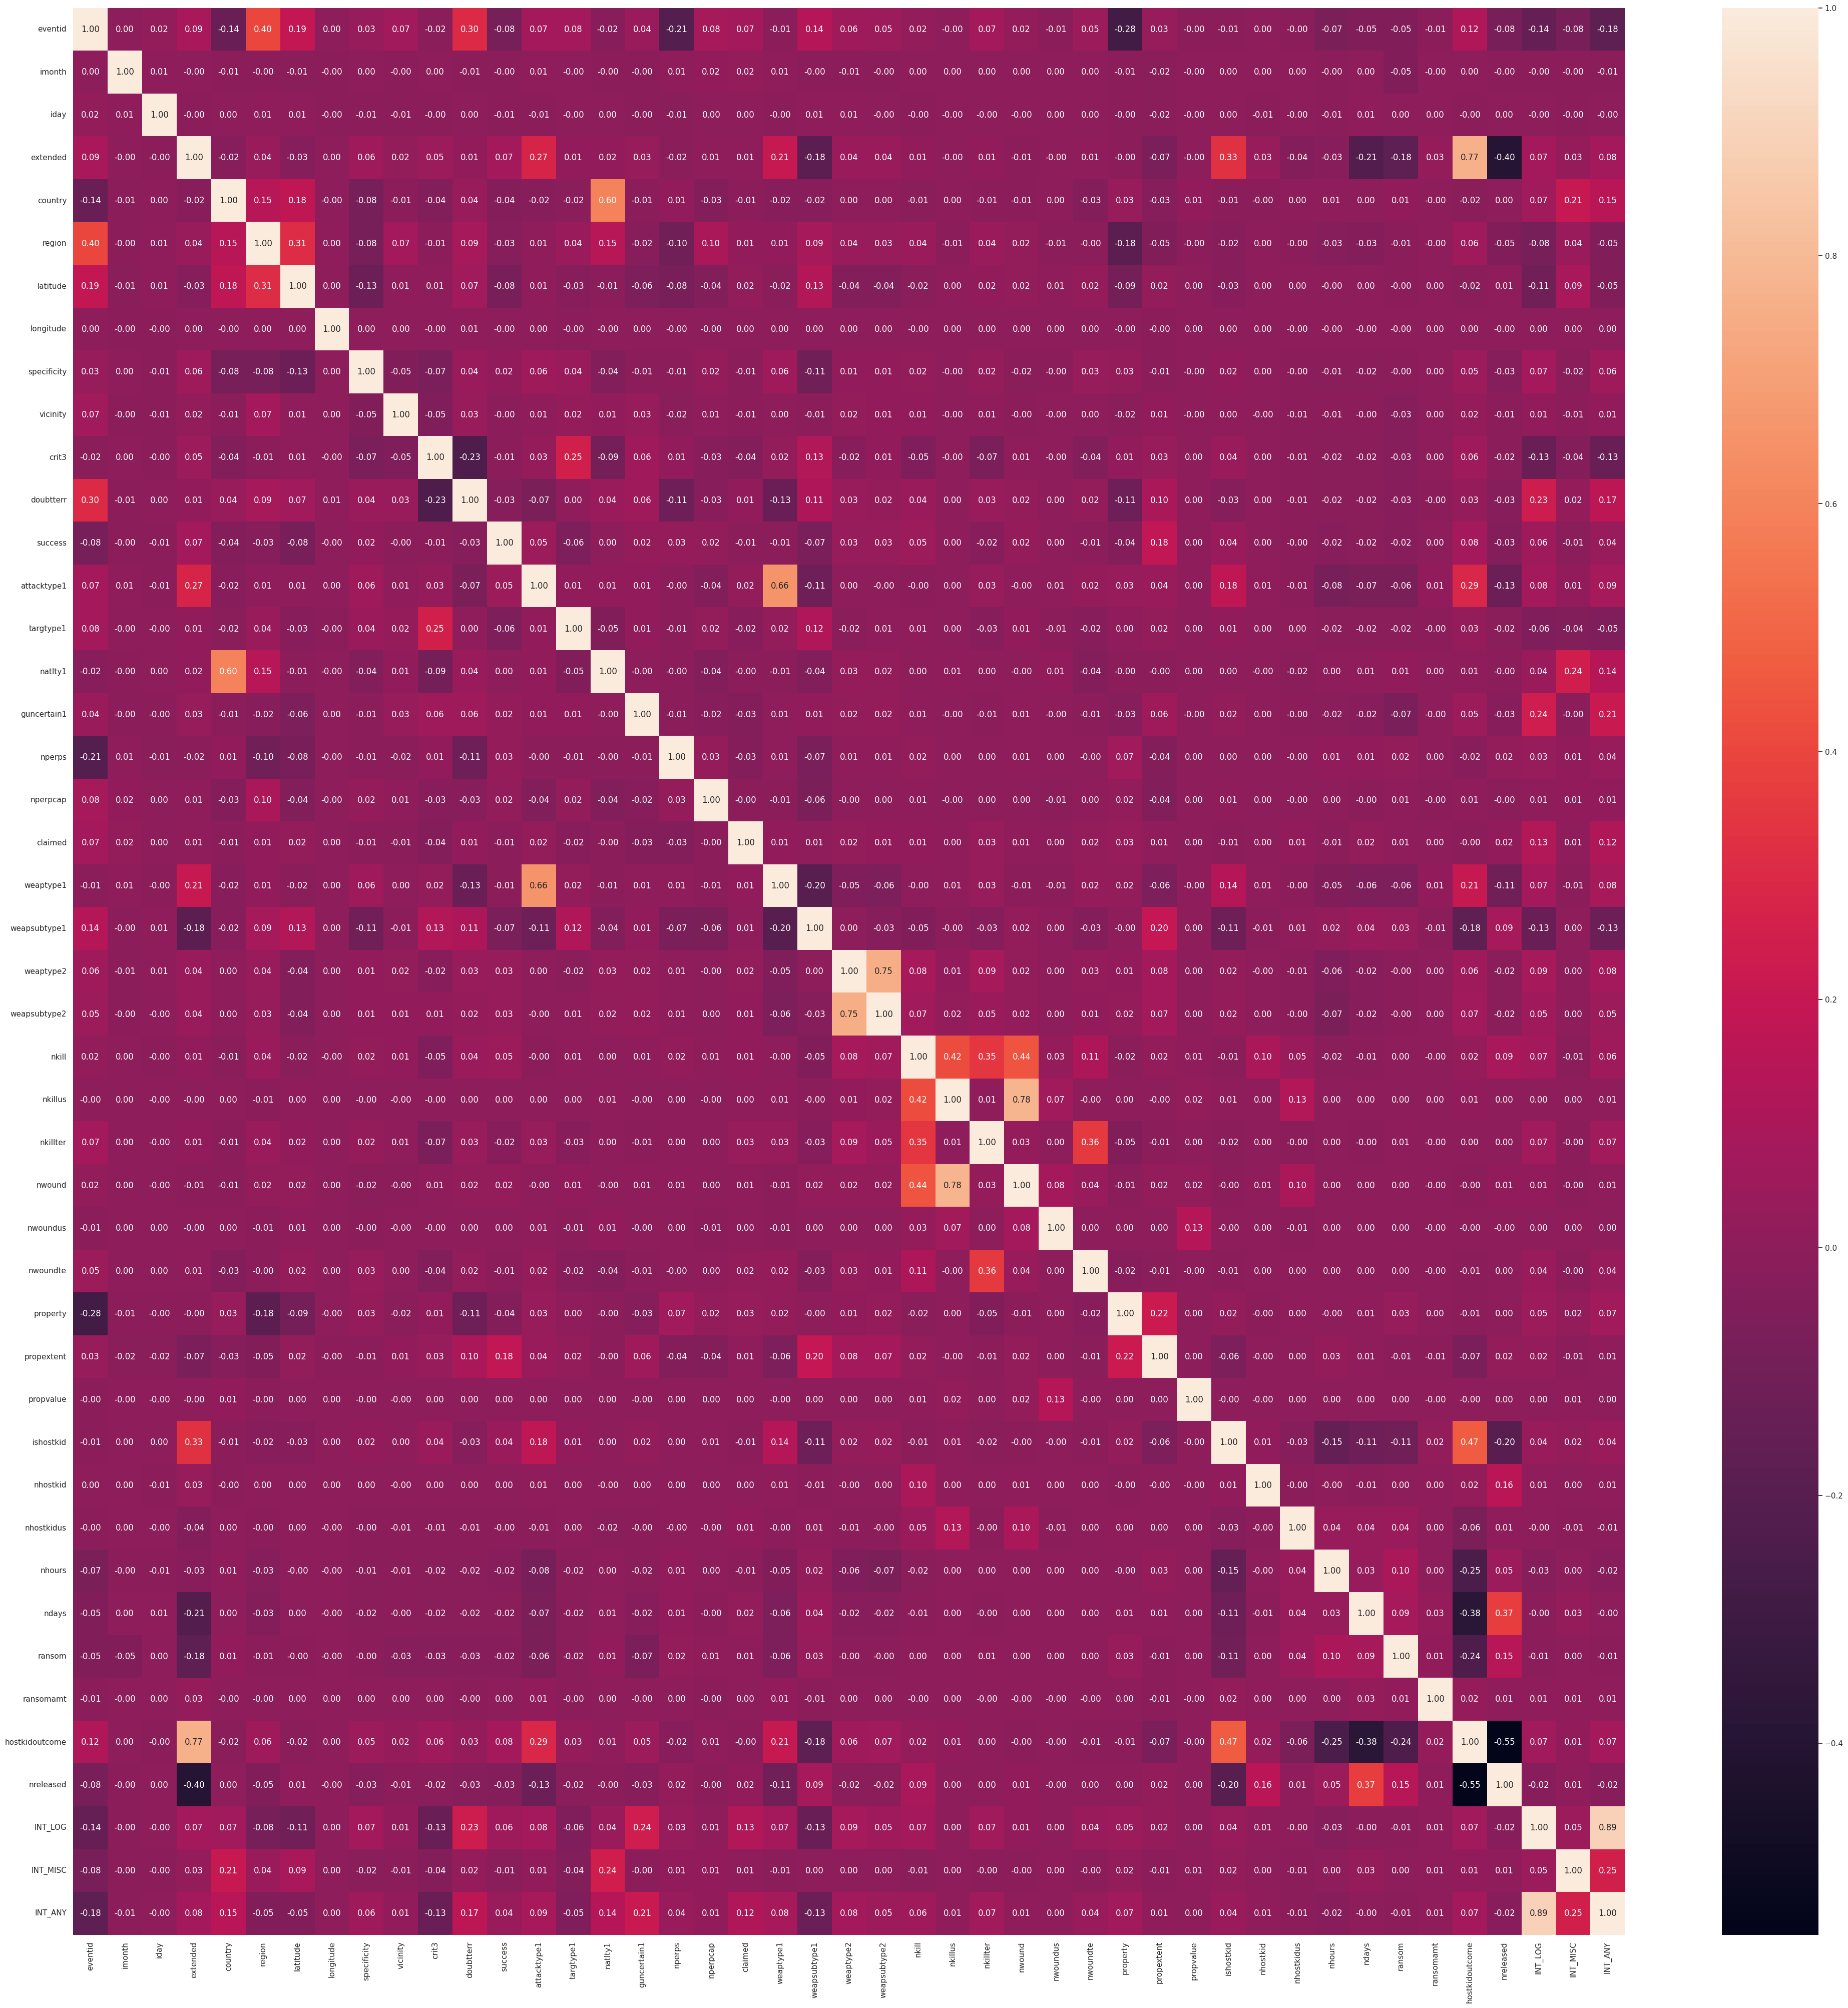

In [ ]:
#@title CORR
plt.subplots(figsize=(50,50))
corr = ndf.corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

DATASET DIFICILMENTE SEPARABLE

In [ ]:
#@title TRAIN TEST SPLIT
X = ndf.drop('country', axis=1)
y = ndf['country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

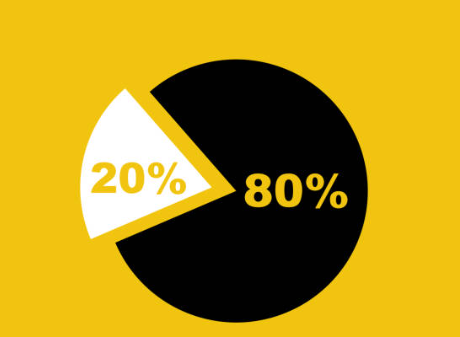

**CLASIFICACIÓN**

In [ ]:
#@title DECISION TREE CLASSIFIER
#Utilizar el clasificador DecisionTreeClassifier con parámetros por defecto, y reportar accuracy_score
est = DecisionTreeClassifier()
est.fit(X_train, y_train)
print("default: ", accuracy_score(y_test, est.predict(X_test)))

#Tunning de parámetros DecisionTreeClassifier: max_depth y criterion, y reportar accuracy_score
criterion=['gini', 'entropy', 'log_loss']
for c in criterion:
  est = DecisionTreeClassifier(criterion=c, max_depth=6)
  est.fit(X_train, y_train)
  print(c, ": ",accuracy_score(y_test, est.predict(X_test)))

default:  0.98813946448719
gini :  0.6862874597539833
entropy :  0.8622967060183274
log_loss :  0.8622967060183274


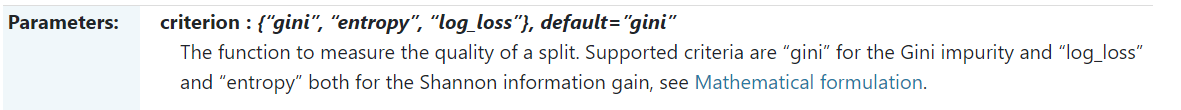

In [ ]:
#@title RANDOM FOREST CLASSIFIER
#Utilizar el clasificador RandomForestClassifier con parámetros por defecto, y reportar accuracy_score
est = RandomForestClassifier()
est.fit(X_train, y_train)
print("default: ", accuracy_score(y_test, est.predict(X_test)))

#Tunning de parámetros RandomForestClassifier: n_estimators, max_depth y criterion, y reportar accuracy_score
criterion = ['gini', 'entropy', 'log_loss']
for c in criterion:
  est = RandomForestClassifier(n_estimators=50, criterion=c, max_depth=6)
  est.fit(X_train, y_train)
  print(c, ": ", accuracy_score(y_test, est.predict(X_test)))

default:  0.9845070034948677
gini :  0.7339497509562729
entropy :  0.7718429235807259
log_loss :  0.7903904895566747


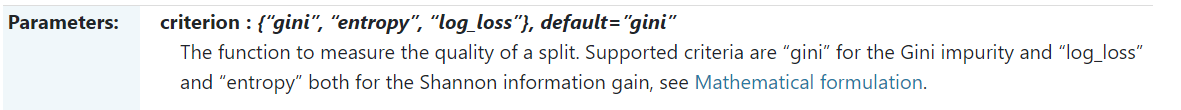

In [ ]:
#@title SUPPORT VECTOR CLASSIFIER
#Utilizar el clasificador SVC con parámetros por defecto, y reportar accuracy_score
est = SVC()
est.fit(X_train, y_train)
print("default: ", accuracy_score(y_test, est.predict(X_test)))

default:  0.15539778199730317


In [ ]:
#Tunning de parámetros SVC: kernel, y reportar accuracy_score
kernel = ['linear', 'poly', 'sigmoid']
for k in kernel:
  est = RandomForestClassifier(kernel = k)
  est.fit(X_train, y_train)
  print(k, ": ", accuracy_score(y_test, est.predict(X_test)))

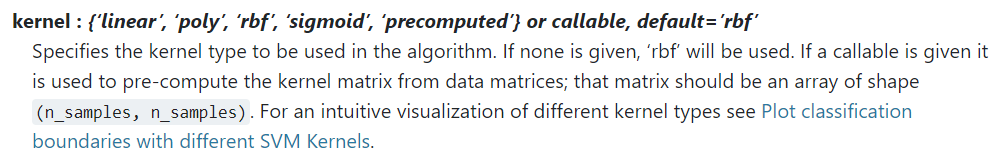

**REGRESIÓN**

In [ ]:
#@title DECISION TREE REGRESSOR
#Utilizar el clasificador DecisionTreeRegressor con parámetros por defecto, y reportar accuracy_score
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
print("Accuracy: %.3f"% regressor.score(X_test, y_test))
print("MSE:  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE: %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE:  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

#Tunning de parámetros DecisionTreeRegressor: max_depth y criterion, y reportar accuracy_score
criterion = ['squared_error', 'friedman_mse', 'poisson'] #'absolute_error'
for c in criterion:
  regressor = DecisionTreeRegressor(max_depth=6, criterion=c)
  regressor.fit(X_train, y_train)
  print("Accuracy",c,": %.3f"% regressor.score(X_test, y_test))
  print("MSE ",c,":  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
  print("RMSE",c,": %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
  print("MAE",c,":  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

Accuracy: 0.967
MSE:  418.895
RMSE: 20.467
MAE:  1.445
Accuracy squared_error : 0.882
MSE  squared_error :  1478.184
RMSE squared_error : 38.447
MAE squared_error :  11.698
Accuracy friedman_mse : 0.881
MSE  friedman_mse :  1492.332
RMSE friedman_mse : 38.631
MAE friedman_mse :  11.726
Accuracy poisson : 0.888
MSE  poisson :  1401.638
RMSE poisson : 37.438
MAE poisson :  10.959


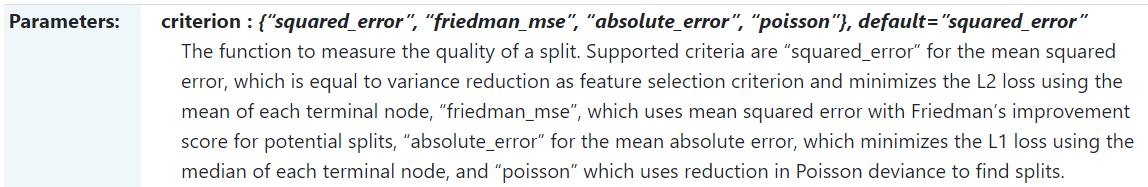

In [ ]:
#@title RANDOM FOREST REGRESSOR
#Utilizar el clasificador RandomForestRegressor con parámetros por defecto, y reportar accuracy_score
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
print("Accuracy: %.3f"% regressor.score(X_test, y_test))
print("MSE:  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE: %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE:  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

Accuracy: 0.977
MSE:  288.380
RMSE: 16.982
MAE:  1.749


In [ ]:
#Tunning de parámetros RandomForestRegressor: n_estimators, max_depth y criterion, y reportar accuracy_score
criterion = ['squared_error', 'friedman_mse', 'poisson']#'absolute_error'
for c in criterion:
  regressor = RandomForestRegressor(n_estimators=50, criterion=c, max_depth=6)
  regressor.fit(X_train, y_train)
  print("Accuracy ",c,": %.3f"% regressor.score(X_test, y_test))
  print("MSE ",c,":  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
  print("RMSE ",c,": %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
  print("MAE ",c,":  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

Accuracy  squared_error : 0.886
MSE  squared_error :  1435.209
RMSE  squared_error : 37.884
MAE  squared_error :  11.311
Accuracy  friedman_mse : 0.886
MSE  friedman_mse :  1432.056
RMSE  friedman_mse : 37.843
MAE  friedman_mse :  11.379
Accuracy  poisson : 0.894
MSE  poisson :  1325.762
RMSE  poisson : 36.411
MAE  poisson :  9.511


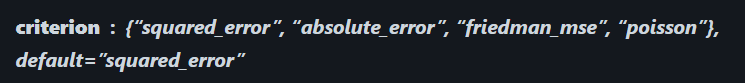

In [ ]:
#@title SUPPORT VECTOR REGRESSOR
#Utilizar el clasificador SVR con parámetros por defecto, y reportar accuracy_score
regressor = SVR()
regressor.fit(X_train, y_train)
print("Accuracy: %.3f"% regressor.score(X_test, y_test))
print("MSE:  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE: %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE:  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

Accuracy: -0.094
MSE:  13722.386
RMSE: 117.143
MAE:  68.717


In [ ]:
#Tunning de parámetros SVR: kernel, y reportar accuracy_score
kernel = ['linear', 'poly', 'sigmoid']
for k in kernel:
  regressor = SVR(kernel = k)
  regressor.fit(X_train, y_train)
  print("Accuracy: %.3f"% regressor.score(X_test, y_test))
  print("MSE:  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
  print("RMSE: %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
  print("MAE:  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

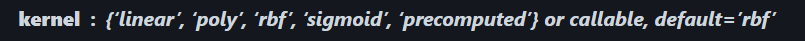

In [ ]:
#@title DEEP LEARNING
#Utilizar una arquitectura de una red neuronal artificial simple (capa entrada, capa oculta, capa salida) con 10, 20 y 30 epochs, y reportar accuracy_score(S)
num_c = np.unique(df["country"]).shape[0]
max_y_train = np.max(y_train)
num_c = max(num_c, max_y_train + 1)
y_train_n = tf.keras.utils.to_categorical(y_train, num_classes=num_c)
y_test_n = tf.keras.utils.to_categorical(y_test, num_classes=num_c)
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(num_c, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_n, epochs=10, batch_size=64)
S = np.argmax(model.predict(X_test), axis=1)

Epoch 1/10
2272/2272 [==============================] - 23s 10ms/step - loss: 1604351872.0000 - accuracy: 0.0452
Epoch 2/10
2272/2272 [==============================] - 20s 9ms/step - loss: 16040902.0000 - accuracy: 0.1042
Epoch 3/10
2272/2272 [==============================] - 23s 10ms/step - loss: 28.0424 - accuracy: 0.1353
Epoch 4/10
2272/2272 [==============================] - 21s 9ms/step - loss: 36.7218 - accuracy: 0.1353
Epoch 5/10
2272/2272 [==============================] - 30s 13ms/step - loss: 228.2263 - accuracy: 0.1353
Epoch 6/10
2272/2272 [==============================] - 19s 9ms/step - loss: 31.3408 - accuracy: 0.1353
Epoch 7/10
2272/2272 [==============================] - 20s 9ms/step - loss: 3.6787 - accuracy: 0.1353
Epoch 8/10
2272/2272 [==============================] - 24s 11ms/step - loss: 3.6757 - accuracy: 0.1353
Epoch 9/10
2272/2272 [==============================] - 19s 9ms/step - loss: 3.6744 - accuracy: 0.1353
Epoch 10/10
1136/1136 [=========================

In [ ]:
num_c = np.unique(df["country"]).shape[0]
max_y_train = np.max(y_train)
num_c = max(num_c, max_y_train + 1)
y_train_n = tf.keras.utils.to_categorical(y_train, num_classes=num_c)
y_test_n = tf.keras.utils.to_categorical(y_test, num_classes=num_c)
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(num_c, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_n, epochs=20, batch_size=64)
S = np.argmax(model.predict(X_test), axis=1)

Epoch 1/20
2272/2272 [==============================] - 22s 10ms/step - loss: 1897566720.0000 - accuracy: 0.0447
Epoch 2/20
2272/2272 [==============================] - 20s 9ms/step - loss: 19885056.0000 - accuracy: 0.1032
Epoch 3/20
2272/2272 [==============================] - 20s 9ms/step - loss: 139.4179 - accuracy: 0.1353
Epoch 4/20
2272/2272 [==============================] - 23s 10ms/step - loss: 332.2237 - accuracy: 0.1352
Epoch 5/20
2272/2272 [==============================] - 22s 10ms/step - loss: 65.6464 - accuracy: 0.1353
Epoch 6/20
2272/2272 [==============================] - 20s 9ms/step - loss: 1739.0983 - accuracy: 0.1352
Epoch 7/20
2272/2272 [==============================] - 21s 9ms/step - loss: 3.6790 - accuracy: 0.1353
Epoch 8/20
2272/2272 [==============================] - 21s 9ms/step - loss: 3.6758 - accuracy: 0.1353
Epoch 9/20
2272/2272 [==============================] - 20s 9ms/step - loss: 3.6744 - accuracy: 0.1353
Epoch 10/20
2272/2272 [=======================

In [ ]:
num_c = np.unique(df["country"]).shape[0]
max_y_train = np.max(y_train)
num_c = max(num_c, max_y_train + 1)
y_train_n = tf.keras.utils.to_categorical(y_train, num_classes=num_c)
y_test_n = tf.keras.utils.to_categorical(y_test, num_classes=num_c)
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(num_c, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_n, epochs=30, batch_size=64)
S = np.argmax(model.predict(X_test), axis=1)

Epoch 1/30
2272/2272 [==============================] - 21s 9ms/step - loss: 1477851776.0000 - accuracy: 0.0446
Epoch 2/30
2272/2272 [==============================] - 20s 9ms/step - loss: 9033157.0000 - accuracy: 0.1114
Epoch 3/30
2272/2272 [==============================] - 21s 9ms/step - loss: 12.1002 - accuracy: 0.1353
Epoch 4/30
2272/2272 [==============================] - 21s 9ms/step - loss: 3.8061 - accuracy: 0.1353
Epoch 5/30
2272/2272 [==============================] - 22s 10ms/step - loss: 3.7087 - accuracy: 0.1353
Epoch 6/30
2272/2272 [==============================] - 22s 10ms/step - loss: 3.6861 - accuracy: 0.1353
Epoch 7/30
2272/2272 [==============================] - 20s 9ms/step - loss: 3.6786 - accuracy: 0.1353
Epoch 8/30
2272/2272 [==============================] - 20s 9ms/step - loss: 3.6756 - accuracy: 0.1353
Epoch 9/30
2272/2272 [==============================] - 22s 9ms/step - loss: 3.6744 - accuracy: 0.1353
Epoch 10/30
2272/2272 [==============================] 

In [ ]:
#Utilizar una arquitectura de una red neuronal artificial simple (capa entrada, (3) capas ocultas, capa salida) con 10, 20 y 30 epochs, y reportar accuracy_score(S)
num_c = np.unique(df["country"]).shape[0]
max_y_train = np.max(y_train)
num_c = max(num_c, max_y_train + 1)
y_train_n = tf.keras.utils.to_categorical(y_train, num_classes=num_c)
y_test_n = tf.keras.utils.to_categorical(y_test, num_classes=num_c)
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_c)
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_n, epochs=10, batch_size=64)
S = np.argmax(model.predict(X_test), axis=1)

Epoch 1/10
2272/2272 [==============================] - 139s 8ms/step - loss: 8.4409 - accuracy: 0.0771
Epoch 2/10
2272/2272 [==============================] - 17s 8ms/step - loss: 8.0795 - accuracy: 0.0797
Epoch 3/10
2272/2272 [==============================] - 22s 10ms/step - loss: 8.1117 - accuracy: 0.0797
Epoch 4/10
2272/2272 [==============================] - 17s 8ms/step - loss: 8.1104 - accuracy: 0.0797
Epoch 5/10
2272/2272 [==============================] - 17s 8ms/step - loss: 8.1272 - accuracy: 0.0797
Epoch 6/10
2272/2272 [==============================] - 17s 8ms/step - loss: 8.2084 - accuracy: 0.0797
Epoch 7/10
2272/2272 [==============================] - 18s 8ms/step - loss: 8.2821 - accuracy: 0.0797
Epoch 8/10
2272/2272 [==============================] - 17s 8ms/step - loss: 8.2821 - accuracy: 0.0797
Epoch 9/10
2272/2272 [==============================] - 18s 8ms/step - loss: 8.2821 - accuracy: 0.0797
Epoch 10/10
1136/1136 [==============================] - 3s 3ms/step


In [ ]:
num_c = np.unique(df["country"]).shape[0]
max_y_train = np.max(y_train)
num_c = max(num_c, max_y_train + 1)
y_train_n = tf.keras.utils.to_categorical(y_train, num_classes=num_c)
y_test_n = tf.keras.utils.to_categorical(y_test, num_classes=num_c)
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_c)
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_n, epochs=20, batch_size=64)
S = np.argmax(model.predict(X_test), axis=1)

Epoch 1/20
2272/2272 [==============================] - 19s 8ms/step - loss: 10.4465 - accuracy: 0.0453
Epoch 2/20
2272/2272 [==============================] - 17s 7ms/step - loss: 9.1386 - accuracy: 0.0459
Epoch 3/20
2272/2272 [==============================] - 17s 7ms/step - loss: 9.0057 - accuracy: 0.0459
Epoch 4/20
2272/2272 [==============================] - 17s 7ms/step - loss: 9.4286 - accuracy: 0.0459
Epoch 5/20
2272/2272 [==============================] - 17s 7ms/step - loss: 11.5288 - accuracy: 0.0459
Epoch 6/20
2272/2272 [==============================] - 17s 8ms/step - loss: 11.5288 - accuracy: 0.0459
Epoch 7/20
2272/2272 [==============================] - 18s 8ms/step - loss: 11.5288 - accuracy: 0.0459
Epoch 8/20
2272/2272 [==============================] - 18s 8ms/step - loss: 11.5288 - accuracy: 0.0459
Epoch 9/20
2272/2272 [==============================] - 17s 7ms/step - loss: 11.5288 - accuracy: 0.0459
Epoch 10/20
2272/2272 [==============================] - 18s 8ms/st

In [ ]:
num_c = np.unique(df["country"]).shape[0]
max_y_train = np.max(y_train)
num_c = max(num_c, max_y_train + 1)
y_train_n = tf.keras.utils.to_categorical(y_train, num_classes=num_c)
y_test_n = tf.keras.utils.to_categorical(y_test, num_classes=num_c)
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_c)
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_n, epochs=30, batch_size=64)
S = np.argmax(model.predict(X_test), axis=1)

Epoch 1/30
2272/2272 [==============================] - 18s 8ms/step - loss: 8.3734 - accuracy: 0.1329
Epoch 2/30
2272/2272 [==============================] - 17s 8ms/step - loss: 8.1692 - accuracy: 0.1353
Epoch 3/30
2272/2272 [==============================] - 19s 8ms/step - loss: 8.4255 - accuracy: 0.1353
Epoch 4/30
2272/2272 [==============================] - 17s 8ms/step - loss: 8.4255 - accuracy: 0.1353
Epoch 5/30
2272/2272 [==============================] - 16s 7ms/step - loss: 8.4255 - accuracy: 0.1353
Epoch 6/30
2272/2272 [==============================] - 17s 7ms/step - loss: 8.4255 - accuracy: 0.1353
Epoch 7/30
2272/2272 [==============================] - 17s 7ms/step - loss: 8.4255 - accuracy: 0.1353
Epoch 8/30
2272/2272 [==============================] - 17s 7ms/step - loss: 8.4255 - accuracy: 0.1353
Epoch 9/30
2272/2272 [==============================] - 17s 7ms/step - loss: 8.4255 - accuracy: 0.1353
Epoch 10/30
2272/2272 [==============================] - 16s 7ms/step - l

In [ ]:
#Utilizar una arquitectura de una red neuronal artificial simple (capa entrada, (6) capas ocultas, capa salida) con 10, 20 y 30 epochs, y reportar accuracy_score(S)
num_c = np.unique(df["country"]).shape[0]
max_y_train = np.max(y_train)
num_c = max(num_c, max_y_train + 1)
y_train_n = tf.keras.utils.to_categorical(y_train, num_classes=num_c)
y_test_n = tf.keras.utils.to_categorical(y_test, num_classes=num_c)
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(num_c, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_n, epochs=10, batch_size=64)
S = np.argmax(model.predict(X_test), axis=1)

Epoch 1/10
2272/2272 [==============================] - 16s 6ms/step - loss: 518314.0938 - accuracy: 0.1345
Epoch 2/10
2272/2272 [==============================] - 14s 6ms/step - loss: 4.0096 - accuracy: 0.1353
Epoch 3/10
2272/2272 [==============================] - 14s 6ms/step - loss: 3.7470 - accuracy: 0.1353
Epoch 4/10
2272/2272 [==============================] - 14s 6ms/step - loss: 3.6996 - accuracy: 0.1353
Epoch 5/10
2272/2272 [==============================] - 18s 8ms/step - loss: 3.6838 - accuracy: 0.1353
Epoch 6/10
2272/2272 [==============================] - 14s 6ms/step - loss: 3.6776 - accuracy: 0.1353
Epoch 7/10
2272/2272 [==============================] - 14s 6ms/step - loss: 3.6751 - accuracy: 0.1353
Epoch 8/10
2272/2272 [==============================] - 15s 7ms/step - loss: 3.6740 - accuracy: 0.1353
Epoch 9/10
2272/2272 [==============================] - 15s 6ms/step - loss: 3.6736 - accuracy: 0.1353
Epoch 10/10
1136/1136 [==============================] - 3s 2ms/step

In [ ]:
num_c = np.unique(df["country"]).shape[0]
max_y_train = np.max(y_train)
num_c = max(num_c, max_y_train + 1)
y_train_n = tf.keras.utils.to_categorical(y_train, num_classes=num_c)
y_test_n = tf.keras.utils.to_categorical(y_test, num_classes=num_c)
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(num_c, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_n, epochs=20, batch_size=64)
S = np.argmax(model.predict(X_test), axis=1)

Epoch 1/20
2272/2272 [==============================] - 16s 6ms/step - loss: 1271247.2500 - accuracy: 0.1322
Epoch 2/20
2272/2272 [==============================] - 14s 6ms/step - loss: 4.0543 - accuracy: 0.1353
Epoch 3/20
2272/2272 [==============================] - 14s 6ms/step - loss: 3.7612 - accuracy: 0.1353
Epoch 4/20
2272/2272 [==============================] - 14s 6ms/step - loss: 3.7049 - accuracy: 0.1353
Epoch 5/20
2272/2272 [==============================] - 14s 6ms/step - loss: 3.6858 - accuracy: 0.1353
Epoch 6/20
2272/2272 [==============================] - 14s 6ms/step - loss: 3.6784 - accuracy: 0.1353
Epoch 7/20
2272/2272 [==============================] - 14s 6ms/step - loss: 3.6754 - accuracy: 0.1353
Epoch 8/20
2272/2272 [==============================] - 13s 6ms/step - loss: 3.6741 - accuracy: 0.1353
Epoch 9/20
2272/2272 [==============================] - 13s 6ms/step - loss: 3.6737 - accuracy: 0.1353
Epoch 10/20
2272/2272 [==============================] - 17s 7ms/st

In [ ]:
num_c = np.unique(df["country"]).shape[0]
max_y_train = np.max(y_train)
num_c = max(num_c, max_y_train + 1)
y_train_n = tf.keras.utils.to_categorical(y_train, num_classes=num_c)
y_test_n = tf.keras.utils.to_categorical(y_test, num_classes=num_c)
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(num_c, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_n, epochs=30, batch_size=64)
S = np.argmax(model.predict(X_test), axis=1)

Epoch 1/30
2272/2272 [==============================] - 16s 6ms/step - loss: 3116596.7500 - accuracy: 0.0669
Epoch 2/30
2272/2272 [==============================] - 14s 6ms/step - loss: 4.1102 - accuracy: 0.1112
Epoch 3/30
2272/2272 [==============================] - 14s 6ms/step - loss: 3.7731 - accuracy: 0.1353
Epoch 4/30
2272/2272 [==============================] - 14s 6ms/step - loss: 3.7076 - accuracy: 0.1353
Epoch 5/30
2272/2272 [==============================] - 15s 6ms/step - loss: 3.6867 - accuracy: 0.1353
Epoch 6/30
2272/2272 [==============================] - 15s 6ms/step - loss: 3.6788 - accuracy: 0.1353
Epoch 7/30
2272/2272 [==============================] - 15s 6ms/step - loss: 3.6755 - accuracy: 0.1353
Epoch 8/30
2272/2272 [==============================] - 15s 7ms/step - loss: 3.6743 - accuracy: 0.1353
Epoch 9/30
2272/2272 [==============================] - 16s 7ms/step - loss: 3.6737 - accuracy: 0.1353
Epoch 10/30
2272/2272 [==============================] - 15s 7ms/st

In [ ]:
#@title CROSS VALIDATION
#Con DecisionTree[Classifier/Regressor] Utilice el método CrossValidation con KFold(10) folds, y reportar accuracy_score (mean y std)
est = DecisionTreeClassifier()
est.fit(X_train, y_train)
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print(s)
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[0.98959824 0.99003798 0.99009302 0.98860697 0.9889372  0.9882217
 0.98811162 0.98800154 0.98871705 0.98932247]
accuracy 0.989 (+/- 0.00073)


In [ ]:
est = DecisionTreeRegressor()
est.fit(X_train, y_train)
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print(s)
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[460.66347001 487.40172822 376.95601177 433.05641477 249.79189829
 417.82067135 395.90109527 439.66057571 632.09906984 442.90940613]
accuracy 433.626 (+/- 90.45263)
